In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data = pd.read_csv('train.csv')
loan_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
loan_data = loan_data.drop(columns='id', axis=1)

In [4]:
loan_data.head(), loan_data.shape

(   person_age  person_income person_home_ownership  person_emp_length  \
 0          37          35000                  RENT                0.0   
 1          22          56000                   OWN                6.0   
 2          29          28800                   OWN                8.0   
 3          30          70000                  RENT               14.0   
 4          22          60000                  RENT                2.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
 0   EDUCATION          B       6000          11.49                 0.17   
 1     MEDICAL          C       4000          13.35                 0.07   
 2    PERSONAL          A       6000           8.90                 0.21   
 3     VENTURE          B      12000          11.11                 0.17   
 4     MEDICAL          A       6000           6.92                 0.10   
 
   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
 0                      

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

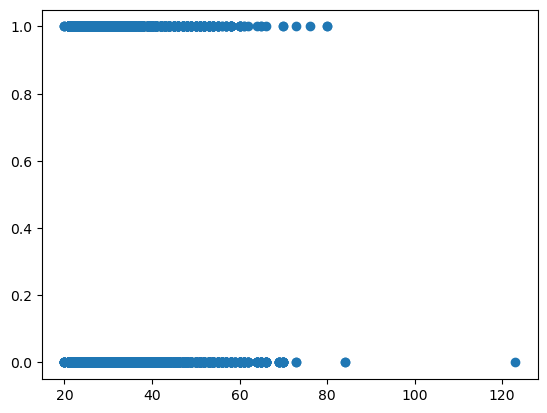

In [6]:
plt.scatter(loan_data['person_age'], loan_data['loan_status'])# by the graph the age factor can be ingnored

<Figure size 10000x10000 with 0 Axes>

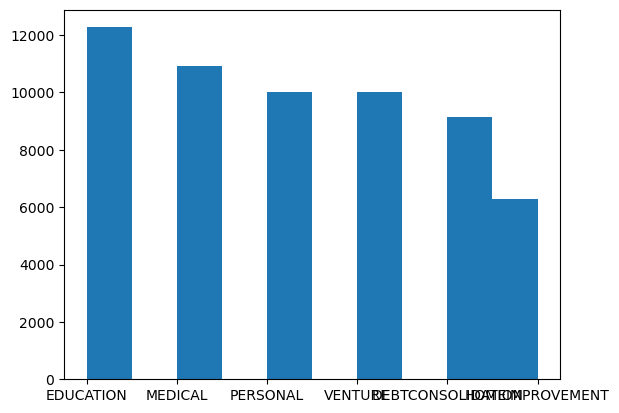

<Figure size 10000x10000 with 0 Axes>

In [7]:
plt.hist(loan_data['loan_intent'],align='mid')
plt.figure(figsize=(100,100))

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [9]:
encoded_loan_intent = ohe.fit_transform(loan_data[['loan_intent']]).toarray()
encoded_loan_intent

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [10]:
encoded_columns = ohe.get_feature_names_out(['loan_intent'])
encoded_df = pd.DataFrame(encoded_loan_intent, columns=encoded_columns)
loan_data = pd.concat([loan_data, encoded_df], axis=1)
loan_data.drop(columns='loan_intent', axis=1, inplace=True)
loan_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,RENT,0.0,B,6000,11.49,0.17,N,14,0,0.0,1.0,0.0,0.0,0.0,0.0
1,22,56000,OWN,6.0,C,4000,13.35,0.07,N,2,0,0.0,0.0,0.0,1.0,0.0,0.0
2,29,28800,OWN,8.0,A,6000,8.90,0.21,N,10,0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,70000,RENT,14.0,B,12000,11.11,0.17,N,5,0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,60000,RENT,2.0,A,6000,6.92,0.10,N,3,0,0.0,0.0,0.0,1.0,0.0,0.0


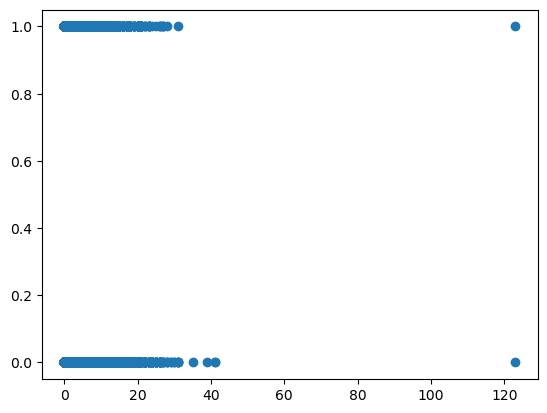

In [11]:
plt.scatter(loan_data['person_emp_length'], loan_data['loan_status'])

<Axes: >

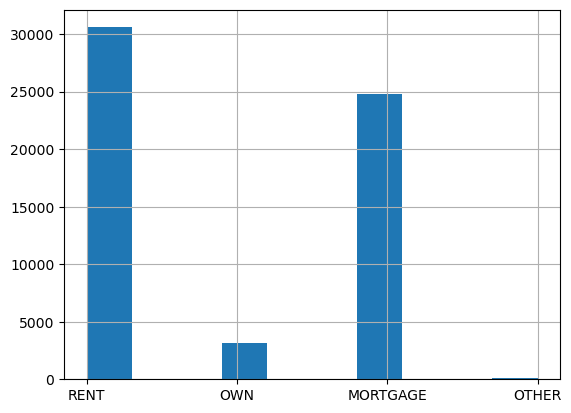

In [12]:
loan_data['person_home_ownership'].hist()

In [13]:
encoded_home_ownership = ohe.fit_transform(loan_data[['person_home_ownership']]).toarray()
encoded_columns = ohe.get_feature_names_out(['person_home_ownership'])
encoded_df = pd.DataFrame(encoded_home_ownership, columns=encoded_columns)
loan_data = pd.concat([loan_data, encoded_df], axis=1)
loan_data.drop(columns='person_home_ownership', axis=1, inplace=True)
loan_data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,37,35000,0.0,B,6000,11.49,0.17,N,14,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,22,56000,6.0,C,4000,13.35,0.07,N,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,28800,8.0,A,6000,8.90,0.21,N,10,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,30,70000,14.0,B,12000,11.11,0.17,N,5,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,22,60000,2.0,A,6000,6.92,0.10,N,3,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
loan_data.replace({'cb_person_default_on_file':{'N':0, "Y":1}},inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10560\952538116.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'cb_person_default_on_file':{'N':0, "Y":1}},inplace=True)


<Axes: >

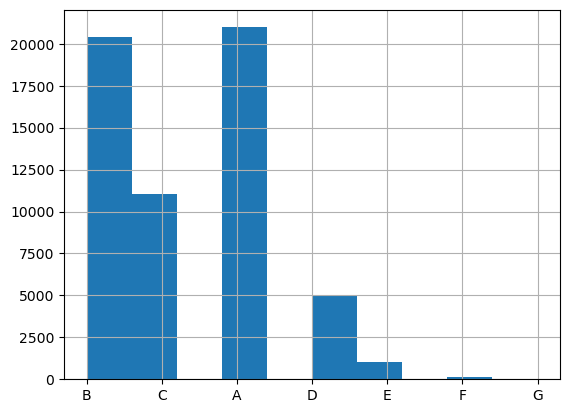

In [15]:
loan_data['loan_grade'].hist()

In [16]:
encoded_loan_grade= ohe.fit_transform(loan_data[['loan_grade']]).toarray()
encoded_columns = ohe.get_feature_names_out(['loan_grade'])
encoded_df = pd.DataFrame(encoded_loan_grade, columns=encoded_columns)
loan_data = pd.concat([loan_data, encoded_df], axis=1)
loan_data.drop(columns='loan_grade', axis=1, inplace=True)
loan_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_DEBTCONSOLIDATION,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,37,35000,0.0,6000,11.49,0.17,0,14,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,22,56000,6.0,4000,13.35,0.07,0,2,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,29,28800,8.0,6000,8.90,0.21,0,10,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,70000,14.0,12000,11.11,0.17,0,5,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,22,60000,2.0,6000,6.92,0.10,0,3,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


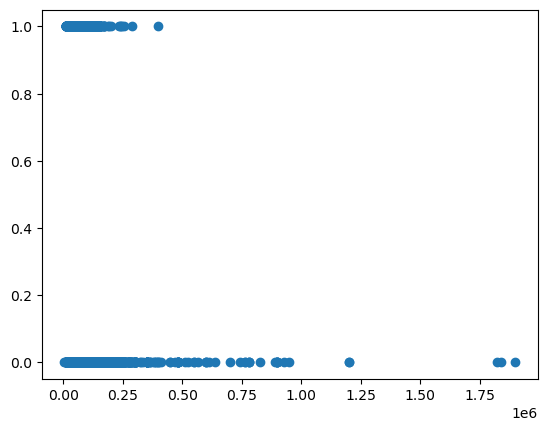

In [17]:
plt.scatter(loan_data['person_income'], loan_data['loan_status'])


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std_scalar = StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [21]:
Correlation = loan_data.corr()
Correlation['loan_status']

person_age                       -0.001130
person_income                    -0.169956
person_emp_length                -0.100428
loan_amnt                         0.144982
loan_int_rate                     0.338948
loan_percent_income               0.378280
cb_person_default_on_file         0.186962
cb_person_cred_hist_length       -0.003030
loan_status                       1.000000
loan_intent_DEBTCONSOLIDATION     0.057682
loan_intent_EDUCATION            -0.051005
loan_intent_HOMEIMPROVEMENT       0.031063
loan_intent_MEDICAL               0.049139
loan_intent_PERSONAL             -0.012461
loan_intent_VENTURE              -0.064378
person_home_ownership_MORTGAGE   -0.202613
person_home_ownership_OTHER       0.002918
person_home_ownership_OWN        -0.087556
person_home_ownership_RENT        0.239620
loan_grade_A                     -0.199089
loan_grade_B                     -0.083765
loan_grade_C                     -0.009654
loan_grade_D                      0.395646
loan_grade_

In [22]:
X = loan_data.drop(columns = 'loan_status', axis =1)
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,37,35000,0.0,6000,11.49,0.17,0,14,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,22,56000,6.0,4000,13.35,0.07,0,2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,29,28800,8.0,6000,8.90,0.21,0,10,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,70000,14.0,12000,11.11,0.17,0,5,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,22,60000,2.0,6000,6.92,0.10,0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y = loan_data['loan_status']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [24]:
X_scalar  = std_scalar.fit_transform(X)
X_scalar

array([[ 1.56620019, -0.7657678 , -1.18719967, ..., -0.13231183,
        -0.05046962, -0.02372814],
       [-0.92005729, -0.21212778,  0.32804728, ..., -0.13231183,
        -0.05046962, -0.02372814],
       [ 0.2401962 , -0.92922343,  0.8331296 , ..., -0.13231183,
        -0.05046962, -0.02372814],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ..., -0.13231183,
        -0.05046962, -0.02372814],
       [-0.92005729, -0.89758686, -0.68211735, ..., -0.13231183,
        -0.05046962, -0.02372814],
       [ 0.5716972 ,  0.28878463, -0.68211735, ..., -0.13231183,
        -0.05046962, -0.02372814]])

In [30]:
from sklearn.svm import SVC
models ={
    "Random_Forest_Classifier" : RandomForestClassifier(),
    "Logistic_Regression" : LogisticRegression(),
    "XGBClassifier" : XGBClassifier(),
    "SVM" : SVC()
}

In [31]:
def training_model(models, X, y):
    for key in models:
        model = models[key]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        
        print(f"Model : {key}")
        print(f"train_accuray ={train_accuracy}")
        print(f"test_accuracy ={test_accuracy}")

In [32]:
training_model(models, X_scalar, y)

Model : Random_Forest_Classifier
train_accuray =0.9999431602879879
test_accuracy =0.9481670929241262
Model : Logistic_Regression
train_accuray =0.9126563092080333
test_accuracy =0.9086104006820119
Model : XGBClassifier
train_accuray =0.9656119742326639
test_accuracy =0.9497016197783461
Model : SVM
train_accuray =0.9450359984842743
test_accuracy =0.9403239556692242


In [34]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5181 fits failed out of a total of 6561.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1466, in fit
    with config_context(verbosity=self.verbosity):
  File "c:\Users\Asus\anacon

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.9521


In [69]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
best_model.fit(X_scalar, y)

c:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:34:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [109]:
test_data_x = pd.read_csv('test.csv')
test_data_x.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [110]:
test_data_x.shape

(39098, 12)

In [111]:
test_data=test_data_x.drop(columns='id', axis=1)

In [112]:
encoded_loan_intent = ohe.fit_transform(test_data[['loan_intent']]).toarray()
encoded_columns = ohe.get_feature_names_out(['loan_intent'])
encoded_df = pd.DataFrame(encoded_loan_intent, columns=encoded_columns)
test_data = pd.concat([test_data, encoded_df], axis=1)
test_data.drop(columns='loan_intent', axis=1, inplace=True)
test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,23,69000,RENT,3.0,F,25000,15.76,0.36,N,2,0.0,0.0,1.0,0.0,0.0,0.0
1,26,96000,MORTGAGE,6.0,C,10000,12.68,0.10,Y,4,0.0,0.0,0.0,0.0,1.0,0.0
2,26,30000,RENT,5.0,E,4000,17.19,0.13,Y,2,0.0,0.0,0.0,0.0,0.0,1.0
3,33,50000,RENT,4.0,A,7000,8.90,0.14,N,7,1.0,0.0,0.0,0.0,0.0,0.0
4,26,102000,MORTGAGE,8.0,D,15000,16.32,0.15,Y,4,0.0,0.0,1.0,0.0,0.0,0.0


In [113]:
encoded_home_ownership = ohe.fit_transform(test_data[['person_home_ownership']]).toarray()
encoded_columns = ohe.get_feature_names_out(['person_home_ownership'])
encoded_df = pd.DataFrame(encoded_home_ownership, columns=encoded_columns)
test_data = pd.concat([test_data, encoded_df], axis=1)
test_data.drop(columns='person_home_ownership', axis=1, inplace=True)
test_data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,23,69000,3.0,F,25000,15.76,0.36,N,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26,96000,6.0,C,10000,12.68,0.10,Y,4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26,30000,5.0,E,4000,17.19,0.13,Y,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,33,50000,4.0,A,7000,8.90,0.14,N,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,26,102000,8.0,D,15000,16.32,0.15,Y,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [114]:
test_data.replace({'cb_person_default_on_file':{'N':0, "Y":1}},inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10560\407959426.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'cb_person_default_on_file':{'N':0, "Y":1}},inplace=True)


In [115]:
encoded_loan_grade= ohe.fit_transform(test_data[['loan_grade']]).toarray()
encoded_columns = ohe.get_feature_names_out(['loan_grade'])
encoded_df = pd.DataFrame(encoded_loan_grade, columns=encoded_columns)
test_data = pd.concat([test_data, encoded_df], axis=1)
test_data.drop(columns='loan_grade', axis=1, inplace=True)
test_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,23,69000,3.0,25000,15.76,0.36,0,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26,96000,6.0,10000,12.68,0.10,1,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26,30000,5.0,4000,17.19,0.13,1,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,50000,4.0,7000,8.90,0.14,0,7,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,102000,8.0,15000,16.32,0.15,1,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
test_data_scalar = std_scalar.fit_transform(test_data)

In [117]:
predictions = best_model.predict(test_data_scalar)

In [118]:
predictions

array([1, 0, 0, ..., 0, 1, 1])

In [119]:
output = pd.DataFrame({'id': test_data_x.id, 'loan_status': predictions})
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scalar, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_:.4f}")

# Use the best model for prediction
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
42 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asus\anaconda3\Lib\site-packages\skle

Best Parameters: {'n_estimators': 800, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Best Accuracy: 0.9508


In [121]:
test_data_scalar

array([[-0.75700653,  0.13014081, -0.43612143, ..., -0.12869434,
        19.27075257, -0.02146145],
       [-0.25971541,  0.8415031 ,  0.33940391, ..., -0.12869434,
        -0.05189211, -0.02146145],
       [-0.25971541, -0.8973825 ,  0.08089546, ...,  7.7703498 ,
        -0.05189211, -0.02146145],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ..., -0.12869434,
        -0.05189211, -0.02146145],
       [-0.92277024, -0.73930199, -0.17761298, ..., -0.12869434,
        -0.05189211, -0.02146145],
       [ 0.56910312, -0.50218123,  0.33940391, ..., -0.12869434,
        -0.05189211, -0.02146145]])

In [122]:
test_data.shape

(39098, 25)

In [123]:
prediction = best_rf.predict(test_data_scalar)

IndexError: list index out of range

In [127]:
rnd = RandomForestClassifier()

In [128]:
rnd.fit(X_scalar, y)

RandomForestClassifier()

In [129]:
prediction = rnd.predict(test_data_scalar)

In [130]:
prediction

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [131]:
output = pd.DataFrame({'id': test_data_x.id, 'loan_status': predictions})
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
